# Generating Graphs from Nodes

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch_geometric
import yaml
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import WandbLogger
import scipy as sp

sys.path.append("../lightning_modules")

In [ ]:
from FC_GAN.utils import generate_polygon, rotate

In [ ]:
from torch_geometric.data import Data
from FC_GAN.Models.gan_gnn import GanGNN

In [ ]:
with open("FC_GAN_config.yaml") as f:
    hparams = yaml.load(f, Loader=yaml.FullLoader)

In [ ]:
model = GanGNN(hparams)

## Model Setup

In [7]:
model.setup(stage="fit")

Setting up dataset


/global/u2/d/danieltm/Side_Work/GraphGAN/notebooks/../lightning_modules/FC_GAN/utils.py:65: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  FC_edges = torch.combinations(torch.arange(0, N), r=2).T


In [17]:
sample = model.trainset[5]

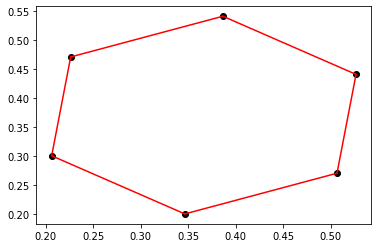

In [18]:
plt.scatter(sample.x.T[0], sample.x.T[1], color="k");
for line, alpha in zip(sample.edge_index.T, sample.edge_attr):
    plt.plot(sample.x[:, 0][line], sample.x[:, 1][line], c="r", alpha=alpha.float().item()); 

In [19]:
import matplotlib.cm as cm

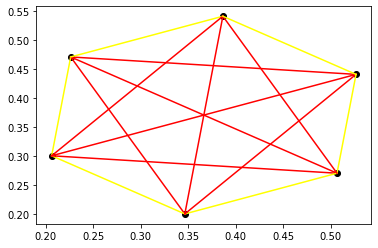

In [22]:
plt.scatter(sample.x.T[0], sample.x.T[1], color="k");
for line, alpha in zip(sample.edge_index.T, sample.edge_attr):
    plt.plot(sample.x[:, 0][line], sample.x[:, 1][line], c=cm.autumn(alpha.float().item())); 

## Training

In [ ]:
logger = WandbLogger(project=hparams["project"], group="InitialTest", save_dir=hparams["artifacts"])
logger.watch(model, log="all")
trainer = Trainer(gpus=1, max_epochs=hparams["max_epochs"], logger=logger)
trainer.fit(model)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: murnanedaniel (use `wandb login --relogin` to force relogin)


wandb: logging graph, to disable use `wandb.watch(log_graph=False)`
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Setting up dataset


  0%|          | 0/20000 [00:00<?, ?it/s]/global/u2/d/danieltm/Side_Work/GraphGAN/notebooks/../lightning_modules/FC_GAN/utils.py:66: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  FC_edges = torch.combinations(torch.arange(0, N), r=2).T
100%|██████████| 10/10 [00:00<00:00, 1098.65it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | generator     | GeneratorGNN     | 297 K 
1 | discriminator | DiscriminatorGNN | 214 K 
---------------------------------------------------
511 K     Trainable params
0         Non-trainable params
511 K     Total params
2.047     Total estimated model params size (MB)


/global/homes/d/danieltm/.conda/envs/exa/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/global/homes/d/danieltm/.conda/envs/exa/lib/python3.8/site-packages/pytorch_lightning/utilities/data.py:59: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 5. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(
/global/homes/d/danieltm/.conda/envs/exa/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 whi

Epoch 0:   4%|▍         | 2/52 [00:01<00:27,  1.81it/s, loss=0.714, v_num=1o59]
Validating: 0it [00:00, ?it/s]
Epoch 0:  44%|████▍     | 23/52 [00:02<00:03,  8.37it/s, loss=0.714, v_num=1o59]

/global/u2/d/danieltm/Side_Work/GraphGAN/notebooks/../lightning_modules/FC_GAN/gnn_base.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(3, 3))



Epoch 1:   6%|▌         | 3/52 [00:01<00:25,  1.93it/s, loss=0.721, v_num=1o59] 
Validating: 0it [00:00, ?it/s]
Epoch 2:   6%|▌         | 3/52 [00:01<00:18,  2.66it/s, loss=0.729, v_num=1o59] 
Validating: 0it [00:00, ?it/s]
Epoch 3:   6%|▌         | 3/52 [00:01<00:18,  2.71it/s, loss=0.737, v_num=1o59] 
Validating: 0it [00:00, ?it/s]
Epoch 4:   6%|▌         | 3/52 [00:01<00:18,  2.58it/s, loss=0.741, v_num=1o59] 
Validating: 0it [00:00, ?it/s]
Epoch 5:   6%|▌         | 3/52 [00:01<00:18,  2.68it/s, loss=0.745, v_num=1o59] 
Validating: 0it [00:00, ?it/s]
Epoch 6:   6%|▌         | 3/52 [00:01<00:20,  2.40it/s, loss=0.745, v_num=1o59] 
Validating: 0it [00:00, ?it/s]
Epoch 7:   6%|▌         | 3/52 [00:01<00:27,  1.78it/s, loss=0.745, v_num=1o59] 
Validating: 0it [00:00, ?it/s]
Epoch 8:   6%|▌         | 3/52 [00:01<00:29,  1.68it/s, loss=0.746, v_num=1o59] 
Validating: 0it [00:00, ?it/s]
Epoch 9:   6%|▌         | 3/52 [00:01<00:20,  2.37it/s, loss=0.751, v_num=1o59] 
Validating: 0it [00:00

## Visualise Examples

In [16]:
from matplotlib.pyplot import cm

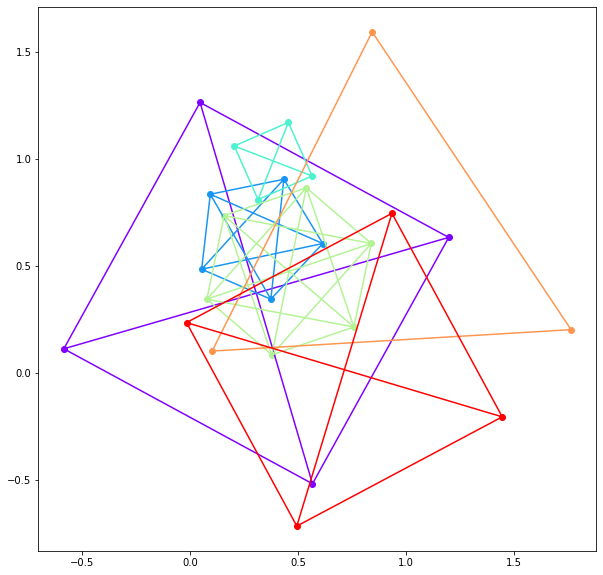

In [17]:
n=6

color = iter(cm.rainbow(np.linspace(0, 1, n)))

plt.figure(figsize=(10,10))
for polygon in model.valset[:n]:
    c = next(color)
    plt.scatter(polygon.x.T[0], polygon.x.T[1], color=c);
    plt.plot(polygon.x[:, 0][polygon.edge_index], polygon.x[:, 1][polygon.edge_index], c=c); 
    